# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf


In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [4]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [7]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           1.52e-06
Time:                        18:57:31   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [ ]:
# Ajustando o modelo de tip_pct em função do logaritmo de net_bill
reg_log = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
print(reg_log.summary())

# Plotando o gráfico de dispersão dos resíduos
tips['res_log'] = reg_log.resid
sns.scatterplot(x='net_bill', y='res_log', data=tips, alpha=0.75)
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs net_bill (modelo logarítmico)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           1.06e-09
Time:                        19:04:50   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

C:\Users\lifem\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['alpha']
  warnings.warn(msg, ValueWarning)


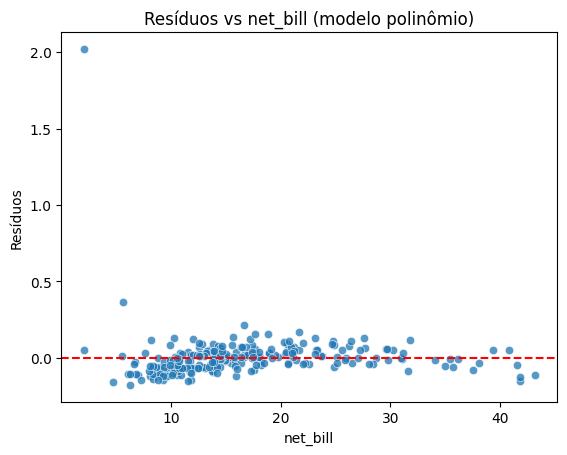

In [11]:
reg_pol = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data=tips,alpha=0.75).fit()
print(reg_pol.summary())

tips['res_pol'] = reg_pol.resid
sns.scatterplot(x='net_bill', y='res_pol', data=tips, alpha=0.75)
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs net_bill (modelo polinômio)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           8.27e-16
Time:                        19:07:31   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

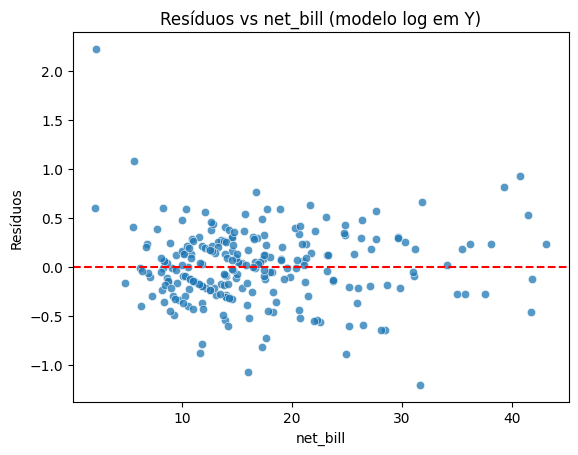

In [12]:
# Ajustando o modelo no log de tip_pct em função de net_bill
reg_log_y = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()
print(reg_log_y.summary())

# Calculando o R² em tip_pct
y_pred = np.exp(reg_log_y.predict())
y_true = tips['tip_pct']
r2_tip_pct = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))

print(f"\nR² em tip_pct: {r2_tip_pct:.4f}")

# Plotando o gráfico de dispersão dos resíduos
tips['res_log_y'] = reg_log_y.resid
sns.scatterplot(x='net_bill', y='res_log_y', data=tips, alpha=0.75)
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs net_bill (modelo log em Y)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           5.20e-20
Time:                        19:09:06   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

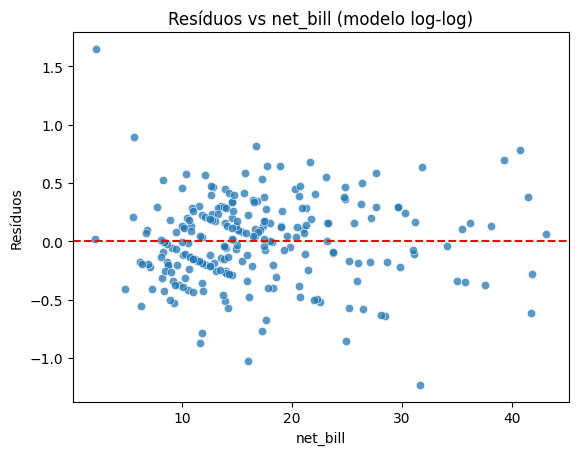

In [13]:
# Ajustando o modelo no log de tip_pct em função do log de net_bill
reg_log_xy = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
print(reg_log_xy.summary())

# Calculando o R² em tip_pct
y_pred = np.exp(reg_log_xy.predict())
y_true = tips['tip_pct']
r2_tip_pct = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))

print(f"\nR² em tip_pct: {r2_tip_pct:.4f}")

# Plotando o gráfico de dispersão dos resíduos
tips['res_log_xy'] = reg_log_xy.resid
sns.scatterplot(x='net_bill', y='res_log_xy', data=tips, alpha=0.75)
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs net_bill (modelo log-log)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

###  6. qual modelo resultou no melhor ajuste?

O ultimo modelo, mas mesmo assim o R² foi ruim